## Classification of Star Type - An IBM Machine Learning Project - Coursera

### Import Libraries

In [1]:
import numpy as np # Numpy
import matplotlib.pyplot as plt # Matplotlib
import pandas as pd # Pandas
import seaborn as sns # Seaborn
from sklearn.utils import shuffle # Shuffle
from sklearn.model_selection import train_test_split # Train Test Split
from sklearn.svm import SVC # SVC
from sklearn.metrics import confusion_matrix, classification_report # Metrics
import itertools  # Itertools
from sklearn import metrics # Metrics
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn import tree # Tree
from sklearn.preprocessing import StandardScaler # Normalizer

### Read Data

In [2]:
df = pd.read_csv('Stars.csv') # Read Dataframe
df.head() # Seek

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


#### Shape of the datadrame

In [3]:
print('Shape of the dataframe:', df.shape) # Print shape

Shape of the dataframe: (240, 7)


#### Describe data

In [4]:
df.describe() # Describe data

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


#### Describe datatypes

In [5]:
df.dtypes # Describe Datatypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

#### Check if the there is any null values

In [6]:
df.isnull() # Check if there are null values

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
235,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False
237,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False


#### Check for unique values

In [7]:
df.nunique() # Unique Values in each column

Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
Type                6
dtype: int64

#### Data Visualization

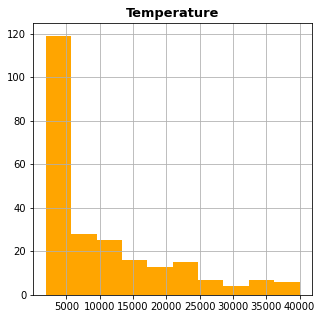

In [8]:
plt.figure(figsize=(5,5)) # Figure
plt.hist(df['Temperature'], color='orange') # Histogram
plt.title('Temperature', fontdict={'fontsize':13, 'fontweight':'semibold'}) # Title
plt.grid(True) # Grid
plt.show() # Show

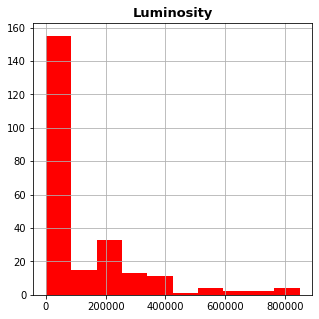

In [42]:
plt.figure(figsize=(5,5)) # Figure
plt.hist(df['L'], color='red') # Histogram
plt.title('Luminosity', fontdict={'fontsize':13, 'fontweight':'semibold'}) # Title
plt.grid(True) # Grid
plt.show() # Show

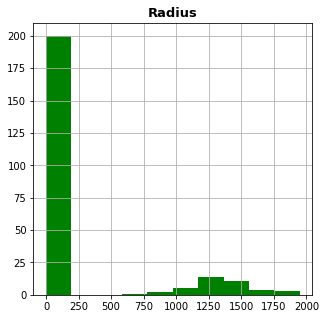

In [43]:
plt.figure(figsize=(5,5)) # Figure
plt.hist(df['R'], color='green') # Histogram
plt.title('Radius', fontdict={'fontsize':13, 'fontweight':'semibold'}) # Title
plt.grid(True) # Grid
plt.show() # Show

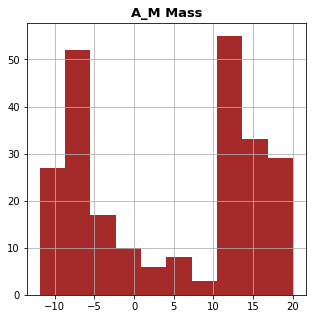

In [44]:
plt.figure(figsize=(5,5)) # Figure
plt.hist(df['A_M'], color='brown') # Histogram
plt.title('A_M Mass', fontdict={'fontsize':13, 'fontweight':'semibold'}) # Title
plt.grid(True) # Grid
plt.show() # Show

#### Boxplots

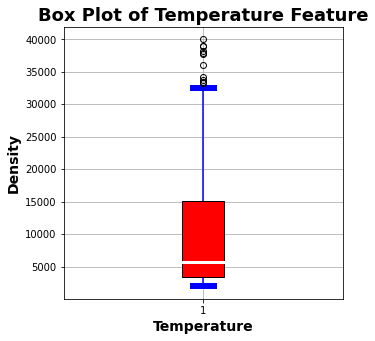

In [47]:
fig_box = plt.figure(figsize =(5, 5))  # Figure size.
ax = fig_box.add_subplot(111)          # Subplot is used because to give colors to the plot as it can be iterable.
fig_box = ax.boxplot(df['Temperature'], patch_artist=True, vert=1) # Plot the box chart.
plt.title('Box Plot of Temperature Feature', fontdict={'fontsize':18, 'fontweight':'semibold'}) # Title
plt.xlabel('Temperature', fontdict={'fontsize':14, 'fontweight':'semibold'}) # X-Label
plt.ylabel('Density', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Y-Label
plt.grid(True)
for whisker in fig_box['whiskers']:                                # Add color to whisker.
    whisker.set(color ='blue',linewidth = 1.5)
for cap in fig_box['caps']:                                        # Add color to cap.
    cap.set(color ='blue', linewidth = 6) 
for median in fig_box['medians']:                                  # Add color to median.
    median.set(color ='white',linewidth = 3) 
for patch in fig_box['boxes']:                                     # Add color to patch.
    patch.set_facecolor(color='red') 
plt.show()                                                         # Display plot.

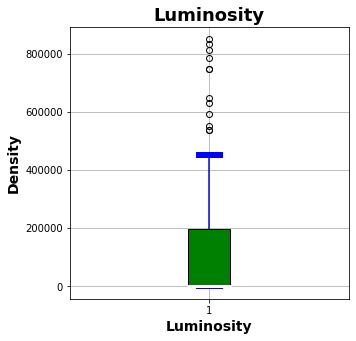

In [48]:
fig_box = plt.figure(figsize =(5, 5))  # Figure size.
ax = fig_box.add_subplot(111)          # Subplot is used because to give colors to the plot as it can be iterable.
fig_box = ax.boxplot(df['L'], patch_artist=True, vert=1) # Plot the box chart.
plt.title('Luminosity', fontdict={'fontsize':18, 'fontweight':'semibold'}) # Title
plt.xlabel('Luminosity', fontdict={'fontsize':14, 'fontweight':'semibold'}) # X-Label
plt.ylabel('Density', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Y-Label
plt.grid(True)
for whisker in fig_box['whiskers']:                                # Add color to whisker.
    whisker.set(color ='blue',linewidth = 1.5)
for cap in fig_box['caps']:                                        # Add color to cap.
    cap.set(color ='blue', linewidth = 6) 
for median in fig_box['medians']:                                  # Add color to median.
    median.set(color ='white',linewidth = 3) 
for patch in fig_box['boxes']:                                     # Add color to patch.
    patch.set_facecolor(color='green') 
plt.show()              

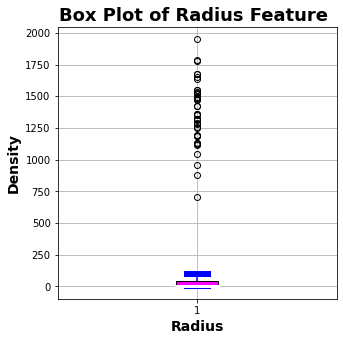

In [50]:
fig_box = plt.figure(figsize =(5, 5))  # Figure size.
ax = fig_box.add_subplot(111)          # Subplot is used because to give colors to the plot as it can be iterable.
fig_box = ax.boxplot(df['R'], patch_artist=True, vert=1) # Plot the box chart.
plt.grid(True) # Grid
plt.title('Box Plot of Radius Feature ', fontdict={'fontsize':18, 'fontweight':'semibold'}) # Title
plt.xlabel('Radius', fontdict={'fontsize':14, 'fontweight':'semibold'}) # X-Label
plt.ylabel('Density', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Y-Label
for whisker in fig_box['whiskers']:                                # Add color to whisker.
    whisker.set(color ='blue',linewidth = 1.5)
for cap in fig_box['caps']:                                        # Add color to cap.
    cap.set(color ='blue', linewidth = 6) 
for median in fig_box['medians']:                                  # Add color to median.
    median.set(color ='white',linewidth = 3) 
for patch in fig_box['boxes']:                                     # Add color to patch.
    patch.set_facecolor(color='magenta') 
plt.show()    

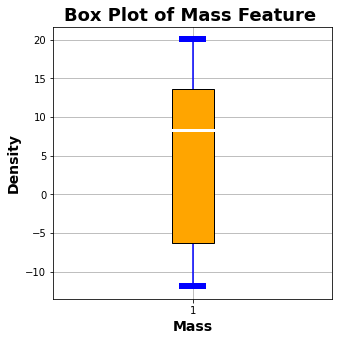

In [51]:
fig_box = plt.figure(figsize =(5, 5))  # Figure size.
ax = fig_box.add_subplot(111)          # Subplot is used because to give colors to the plot as it can be iterable.
fig_box = ax.boxplot(df['A_M'], patch_artist=True, vert=1) # Plot the box chart.
plt.grid(True) # Grid
plt.title('Box Plot of Mass Feature ', fontdict={'fontsize':18, 'fontweight':'semibold'}) # Title
plt.xlabel('Mass', fontdict={'fontsize':14, 'fontweight':'semibold'}) # X-Label
plt.ylabel('Density', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Y-Label
for whisker in fig_box['whiskers']:                                # Add color to whisker.
    whisker.set(color ='blue',linewidth = 1.5)
for cap in fig_box['caps']:                                        # Add color to cap.
    cap.set(color ='blue', linewidth = 6) 
for median in fig_box['medians']:                                  # Add color to median.
    median.set(color ='white',linewidth = 3) 
for patch in fig_box['boxes']:                                     # Add color to patch.
    patch.set_facecolor(color='orange') 
plt.show()    

In [12]:
labels_data = ['Temperature', 'L', 'R',  'A_M', 'Color', 'Spectral_Class'] # Labels
target_name = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants'] # Target

### Data Preprocessing

#### Shuffle Dataset

In [13]:
df = shuffle(df) # Shuffle Data

#### Make two dataframes of labels and features

In [14]:
df_features = df.drop(labels=['Type'], axis = 1) # Drop the Type column
df_labels = df[['Type']] # Labels

#### One hot encode " Color " Column

In [15]:
df_colors = pd.get_dummies(df.Color) # Colors one hot encoding

#### One hot encode " Spectral Class" Column

In [16]:
df_spectral = pd.get_dummies(df.Spectral_Class) # Spectral Class One Hot Encode

#### Drop Color and Spectral Class Columns from features dataframe

In [17]:
df_features = df_features.drop(labels=['Color', 'Spectral_Class'], axis=1) # Drop

#### Concat Features and One hot encoded dataframes

In [18]:
df_feature = pd.concat([df_features, df_colors, df_spectral], axis=1) # Final Features

#### Normalize

#### Train Test split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(df_feature, df_labels, test_size = 0.3, random_state=42) # Train Test Split

In [20]:
X_train = np.array(X_train) # As Array
X_test = np.array(X_test) # As array
Y_train = np.array(Y_train) # As Array
Y_test = np.array(Y_test) # As array
Y_train = Y_train.ravel() # 1-D Array
Y_test = Y_test.ravel() # 1-D Array

#### Normalize

In [21]:
scaler = StandardScaler() # Standard Scaler
X_train = scaler.fit_transform(X_train) # X-train
X_test = scaler.transform(X_test)# X-test

### Support Vector Machine Classifier

In [22]:
SVM = SVC(kernel='linear', random_state = 42, C=2.0) # SVM Object
SVM.fit(X_train, Y_train) # Fit Model

SVC(C=2.0, kernel='linear', random_state=42)

#### Predict 

In [23]:
y_pred_svm = SVM.predict(X_test) # Predict

#### Confusion Matrix

In [24]:
cm_svm = confusion_matrix(Y_test,y_pred_svm) # Confusion Maxtix

In [72]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Reds):
    """ This function prints and plots the confusion matrix. """

    plt.figure(figsize=(10,5)) # Figure 
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # Plot Image
    plt.title(title, fontdict={'fontsize':24}) # Title
    plt.colorbar()   # Show Colorbar
    tick_marks = np.arange(len(classes)) # Array with elements as nuber of classes i.e. [0,1,2,3,4]
    plt.xticks(tick_marks, classes, rotation=45, fontsize=14, fontweight='semibold') # X-Ticks as class names
    plt.yticks(tick_marks, classes, fontsize=14, fontweight='semibold') # Y-Ticks as class names
    
    # Show the number of classified images in the Confusion Matrix Box
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black", fontsize=14, fontweight='semibold')
    
    plt.tight_layout() # Tight Layout
    plt.ylabel('True label', fontdict={'fontsize':14}) # Y-label
    plt.xlabel('Predicted label', fontdict={'fontsize':14}) # X-label
    plt.show() # Show 

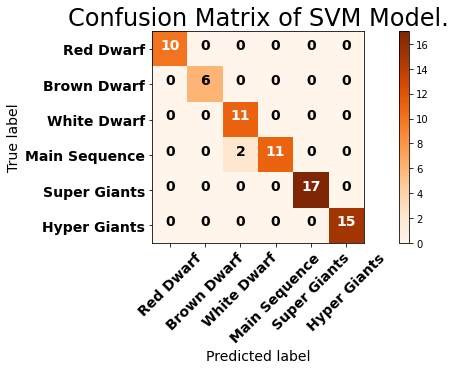

In [73]:
    plot_confusion_matrix(cm_svm, target_name, title='Confusion Matrix of SVM Model.', cmap=plt.cm.Oranges) # Plot CM

#### Find Accuracy of prediction

In [27]:
accuracy = float(cm_svm.diagonal().sum())/len(Y_test) # Accuracy
print('Accuracy of SVM:', accuracy) # Accuracy

Accuracy of SVM: 0.9722222222222222


#### Classification Report

In [28]:
print('Classification Report Support Vector Machines:')
print(classification_report(Y_test, y_pred_svm)) # Classification Report

Classification Report Support Vector Machines:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         6
           2       0.85      1.00      0.92        11
           3       1.00      0.85      0.92        13
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        15

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.98      0.97      0.97        72



### Random Forest Classidier

In [29]:
rf = RandomForestClassifier(n_estimators = 100) # Random Forest Classifier
rf.fit(X_train, Y_train) # Random Forest Fit

RandomForestClassifier()

#### Predict

In [30]:
y_pred_rf = rf.predict(X_test) # Predict

#### Confusion Matrix

In [74]:
cm_rf = confusion_matrix(Y_test, y_pred_rf) # Confusion Maxtix

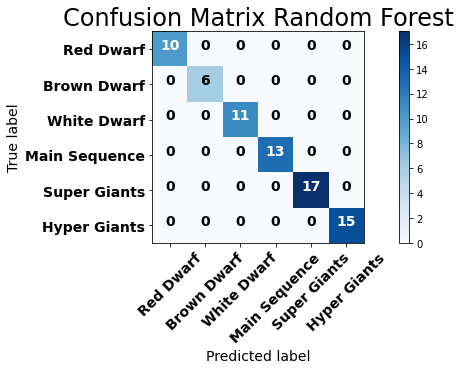

In [75]:
plot_confusion_matrix(cm_rf, target_name, title='Confusion Matrix Random Forest', cmap=plt.cm.Blues) # Plot CM

In [33]:
print("ACCURACY OF THE RANDOM FOREST MODEL: ", metrics.accuracy_score(Y_test, y_pred_rf))

ACCURACY OF THE RANDOM FOREST MODEL:  1.0


#### Classification Report

In [34]:
print('Classification Report Random Forest:')
print(classification_report(Y_test, y_pred_rf)) # Classification Report

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



### Decision Tree Classifier

In [35]:
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
                                     max_depth = 5, min_samples_leaf = 5) # Decision Tree Classifier
dtc.fit(X_train, Y_train) # Fit Model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

#### Predict

In [36]:
y_pred_dtc = dtc.predict(X_test) # Predict

#### Confusion Matrix

In [76]:
cm_dtc = confusion_matrix(Y_test, y_pred_dtc) # Confusion Maxtix

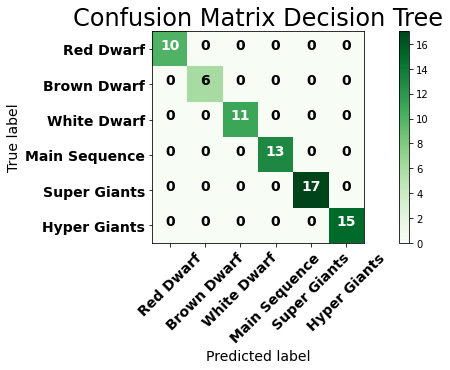

In [77]:
plot_confusion_matrix(cm_dtc, target_name, title='Confusion Matrix Decision Tree', cmap=plt.cm.Greens) # Plot CM

In [39]:
print("ACCURACY OF THE Decision Tree MODEL: ", metrics.accuracy_score(Y_test, y_pred_rf))

ACCURACY OF THE Decision Tree MODEL:  1.0


#### Classification Report

In [40]:
print('Classification Report Decision Tree:')
print(classification_report(Y_test, y_pred_rf)) # Classification Report

Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



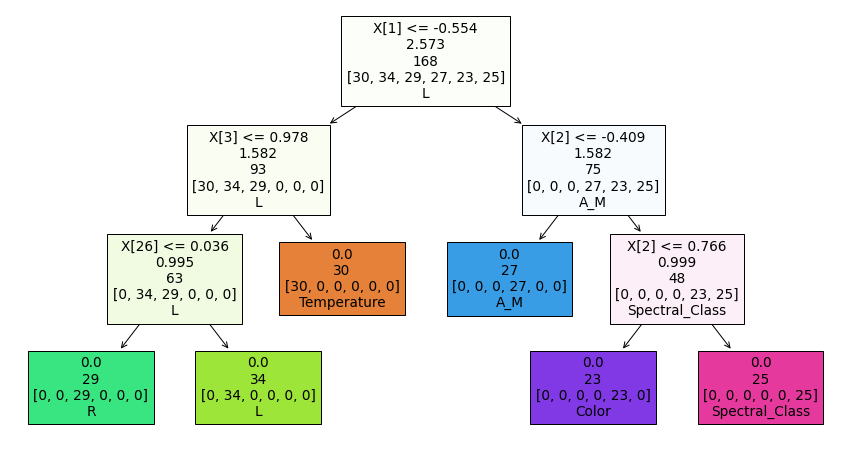

In [78]:
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(dtc, class_names=['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class'], label=['Type']
                   ,filled=True)